## Subject: Social Information NEetworks
## Course Code: CSE3021
## Team Member1: S Sabhari Girish 19BCE1759
## Team Member2: Anthra Devarajan 19BCE1681
## Project Name: Fake News Detection in Social Media
## J component Review-2
## Faculty Name: Dr. Bhuvaneswari Anbalagan

### Importing the required libraries

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Reading the training file

In [2]:
data = pd.read_csv("./train.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
data_sub = data[['title', 'label']]
data_sub.head()

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [5]:
data_sub= data_sub.dropna()
data_sub= data_sub.reset_index()
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20242 entries, 0 to 20241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   20242 non-null  int64 
 1   title   20242 non-null  object
 2   label   20242 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 474.5+ KB


### Comparison of the number of documents having fake and real content

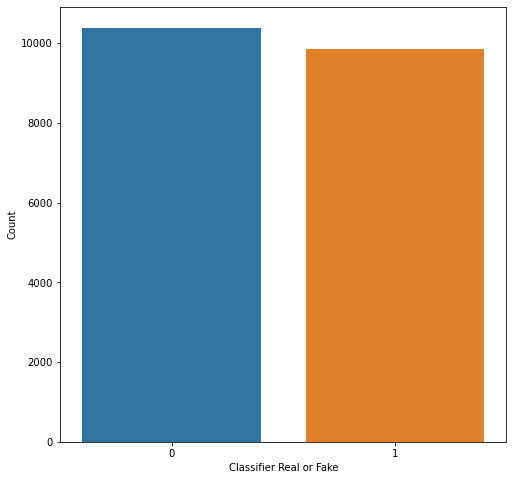

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x='label', data=data_sub)
plt.xlabel('Classifier Real or Fake')
plt.ylabel('Count')
plt.show()

In [7]:
data_subset = data_sub.drop('label', axis=1)
data_subset.head()

,index,title
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired
3,3,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...


### Removing the stop words and stemming the words in the content using the library functions

In [8]:
stemmer = PorterStemmer() 

corpus=[]
for i in range(len(data_subset)):
    review= re.sub('[^A-Za-z]',' ',data_subset['title'][i])
    review= review.lower()
    review= review.split() #get list of words
    review= [stemmer.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review= ' '.join(review)
    corpus.append(review)

### Using countVectorizer to convert the test to numbers using set of weights and logic to oerform calculations 

In [9]:
cv = CountVectorizer(ngram_range =(2,2), max_features = 20000)
X = cv.fit_transform(corpus).toarray() # matrix creation- words as columns, sentences as rows
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using test train split to divide the dataset into training and testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, data_sub['label'], test_size =0.25, random_state =0)

### Using logistic regression to train the data and test of the document contains fake content

In [11]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [12]:
lr_y_pred = lr_classifier.predict(X_test)
confusion_mat = confusion_matrix(y_test, lr_y_pred)
confusion_mat

array([[2006,  590],
       [  60, 2405]], dtype=int64)

In [13]:
accuracy= accuracy_score(y_test, lr_y_pred)
print("Accuracy of Logistic Regression on Count Vectorizer data",accuracy*100)

Accuracy of Logistic Regression on Count Vectorizer data 87.15668840150168
